In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [2]:
og_data = pd.read_csv('bankloans.csv')

In [3]:
og_data.head()

,age,ed,employed,address,income,debtinc,creddebt,othdebt,default,Outcome
0,41,3,17,12,176,9.3,11.359392,5.008608,1,Default
1,27,1,10,6,31,17.3,1.362202,4.000798,0,No Default
2,40,1,15,14,55,5.5,0.856075,2.168925,0,No Default
3,41,1,15,14,120,2.9,2.658720,0.821280,0,No Default
4,24,2,2,0,28,17.3,1.787436,3.056564,1,Default


In [4]:
df = pd.DataFrame(og_data)
df = df.drop('Outcome',axis=1)

In [5]:
X = df.drop('default',axis=1)
y = df['default']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
scaler = StandardScaler()

In [8]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [9]:
log_model = LogisticRegression()

In [10]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [11]:
y_pred = log_model.predict(scaled_X_test)

C:\Users\joshuacubero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


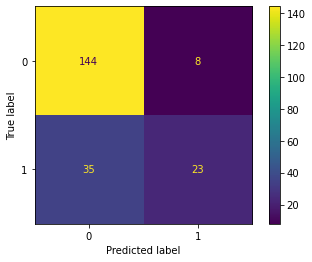

In [12]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       152
           1       0.74      0.40      0.52        58

    accuracy                           0.80       210
   macro avg       0.77      0.67      0.69       210
weighted avg       0.79      0.80      0.77       210



In [14]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

C:\Users\joshuacubero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


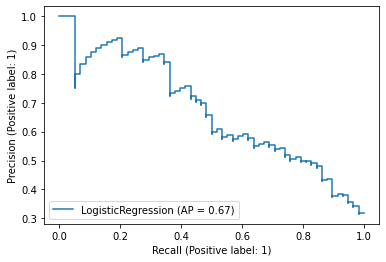

In [15]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

C:\Users\joshuacubero\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


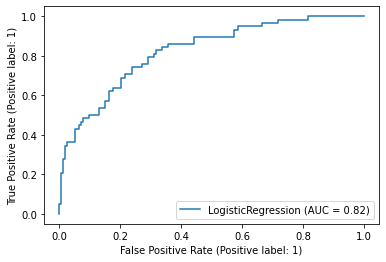

In [16]:
plot_roc_curve(log_model,scaled_X_test,y_test)

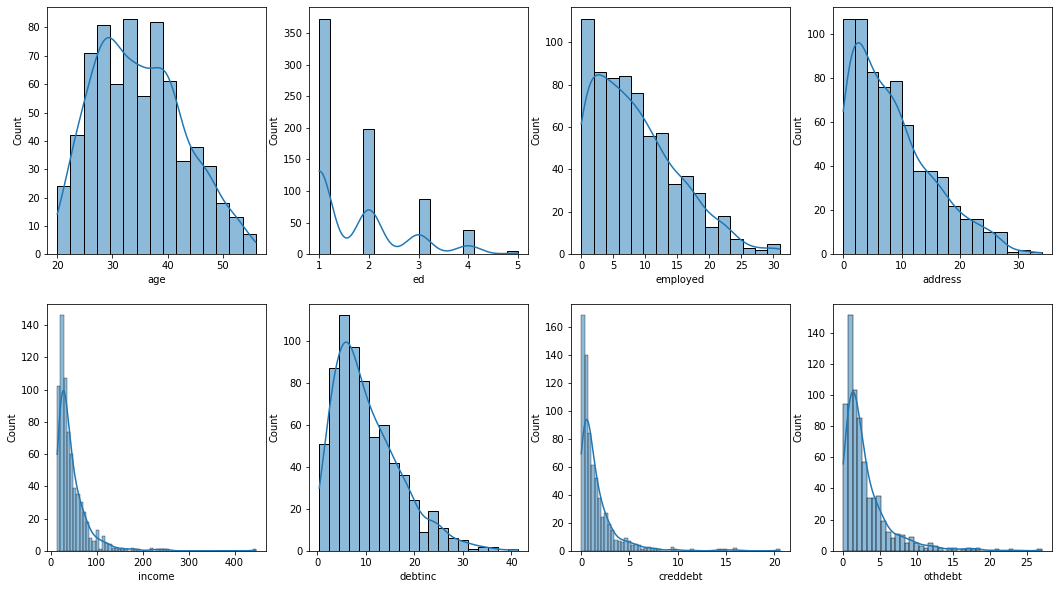

In [21]:
f, axes = plt.subplots(2, 4, figsize=(18, 10))
for ax, feature in zip(axes.flat, df.columns):
    sns.histplot(df[feature] , ax=ax,kde=True)

C:\Users\joshuacubero\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\joshuacubero\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\joshuacubero\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\j

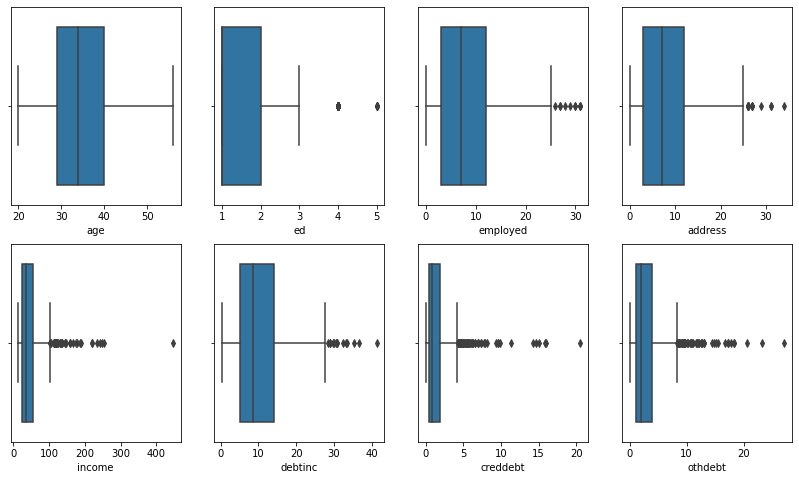

In [32]:
f, axes = plt.subplots(2, 4, figsize=(14, 8))
for ax, feature in zip(axes.flat, df.columns):
    sns.boxplot(df[feature] , ax=ax)

<AxesSubplot:>

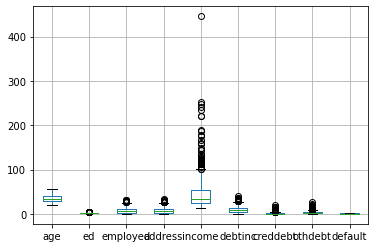